# HW1: Linear Regression Example (2330.tw)

# Step1: Import Data and Observe Data

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("2330.tw.csv")
'''
df= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header=None, sep='\s+')
'''
print(data.head())
type(data)
print(data.head())
print(data.info())
len(data)
print(data.describe())
print(data.columns)

        Date     X1     X2     X3     X4     X5  estimate
0  2018/3/20  253.0  255.0  255.0  255.0  257.0     259.0
1  2018/3/21  252.5  253.0  255.0  255.0  255.0     257.0
2  2018/3/22  251.5  252.5  253.0  255.0  255.0     255.0
3  2018/3/23  245.0  251.5  252.5  253.0  255.0     255.0
4  2018/3/26  243.5  245.0  251.5  252.5  253.0     255.0
        Date     X1     X2     X3     X4     X5  estimate
0  2018/3/20  253.0  255.0  255.0  255.0  257.0     259.0
1  2018/3/21  252.5  253.0  255.0  255.0  255.0     257.0
2  2018/3/22  251.5  252.5  253.0  255.0  255.0     255.0
3  2018/3/23  245.0  251.5  252.5  253.0  255.0     255.0
4  2018/3/26  243.5  245.0  251.5  252.5  253.0     255.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
Date        238 non-null object
X1          238 non-null float64
X2          238 non-null float64
X3          238 non-null float64
X4          238 non-null float64
X5          238 non-null float64
est

        X1     X2     X3     X4     X5
0    253.0  255.0  255.0  255.0  257.0
1    252.5  253.0  255.0  255.0  255.0
2    251.5  252.5  253.0  255.0  255.0
3    245.0  251.5  252.5  253.0  255.0
4    243.5  245.0  251.5  252.5  253.0
5    251.0  243.5  245.0  251.5  252.5
6    245.0  251.0  243.5  245.0  251.5
7    244.0  245.0  251.0  243.5  245.0
8    246.0  244.0  245.0  251.0  243.5
9    246.5  246.0  244.0  245.0  251.0
10   244.0  246.5  246.0  244.0  245.0
11   245.0  244.0  246.5  246.0  244.0
12   245.5  245.0  244.0  246.5  246.0
13   248.0  245.5  245.0  244.0  246.5
14   245.0  248.0  245.5  245.0  244.0
15   244.5  245.0  248.0  245.5  245.0
16   243.5  244.5  245.0  248.0  245.5
17   238.0  243.5  244.5  245.0  248.0
18   238.0  238.0  243.5  244.5  245.0
19   244.5  238.0  238.0  243.5  244.5
20   229.0  244.5  238.0  238.0  243.5
21   226.5  229.0  244.5  238.0  238.0
22   227.0  226.5  229.0  244.5  238.0
23   225.0  227.0  226.5  229.0  244.5
24   222.0  225.0  227.0 

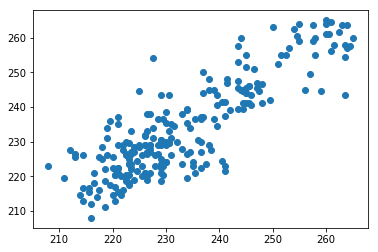

In [14]:
x=data[['X1', 'X2', 'X3', 'X4', 'X5']]
y =data['estimate']
print(x)
print(y)
plt.scatter(x['X2'],y)

# Step2: Feture Engineering (Data PreProcessing=data missing, outlier, normalization, find efficient features, split training and validation set, test set )

                X1        X2        X3        X4        X5  estimate
X1        1.000000  0.957812  0.926389  0.890862  0.859394  0.824570
X2        0.957812  1.000000  0.958561  0.927531  0.892133  0.861075
X3        0.926389  0.958561  1.000000  0.958990  0.928450  0.893450
X4        0.890862  0.927531  0.958990  1.000000  0.959586  0.929342
X5        0.859394  0.892133  0.928450  0.959586  1.000000  0.960084
estimate  0.824570  0.861075  0.893450  0.929342  0.960084  1.000000


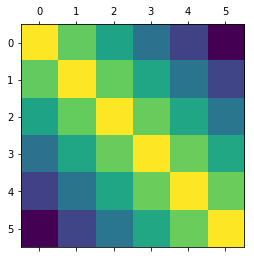

In [15]:
print(data.corr())
plt.matshow(data.corr())

## Step2.1 Prepare x, y fetures and labels for sklearn

In [16]:

x=x.values.reshape(-1,5)
y=y.values.reshape(-1,1)

print(type(x))
print(x.shape)
print(type(y))
print(y.shape)


<class 'numpy.ndarray'>
(238, 5)
<class 'numpy.ndarray'>
(238, 1)


# Step 3: Build Prediction Model

In [17]:
from sklearn.linear_model import LinearRegression as LR
model = LR()
model.fit(x,y)
pre = model.predict(x)

'''
print(model)
a=model.intercept_
b=model.coef_
'''

'\nprint(model)\na=model.intercept_\nb=model.coef_\n'

In [19]:
'''
plt.scatter(x,y)
plt.plot(x,pre,'g-')
plt.savefig('linearRegression')
'''

"\nplt.scatter(x,y)\nplt.plot(x,pre,'g-')\nplt.savefig('linearRegression')\n"

# Step 4: Performance Evaluation

In [30]:
scor=model.score(x,y)
print(scor)
y_pre = model.predict([[245.0,  251.5,  252.5,  253.0,  255.0]])
print(y_pre)

0.9231215767645906
[[254.5987932]]


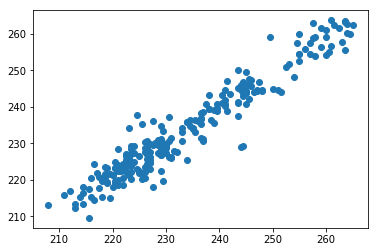

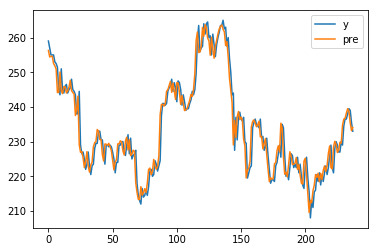

In [40]:
data['pre']=pd.DataFrame(pre)
data
data.columns= ['Date', 'X1', 'X2', 'X3', 'X4', 'X5', 'y', 'pre']
data
plt.scatter(data.y,data.pre)
data2=data[['y','pre']]
data2.plot()

# Step 5  write back to file

In [ ]:
from pandas import Series,DataFrame

pre=pd.DataFrame(pre)
data['pre']=pre
iid =list(range(1,len(pre)+1))
data['myid']=DataFrame(iid)

type(pre)
print(pre[:10])
data

In [ ]:
data.to_csv('results1.csv')

In [ ]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
data.to_sql('pm25sql', con=engine)
engine.execute("SELECT * FROM pm25sql").fetchall()
#[(0, 'User 1'), (1, 'User 2'), (2, 'User 3')]

In [ ]:
# 將 sql 通道打開
import sqlite3
conn = sqlite3.connect('lightdb.sqlite3')


data.to_sql('pm25', conn, if_exists='replace')
tempdata = pd.read_sql('select * from light', conn, index_col=['myid'])
tempdata.head()
conn.close()

'''
cursor = conn.cursor()
sqlcmd='select * from pm25'
cursor.execute(sqlcmd)
'''

<a id="p1"></a>
# 1. Importing Libraries and Packages
We will use these packages to help us manipulate the data and visualize the features/labels as well as measure how well our model performed. Numpy and Pandas are helpful for manipulating the dataframe and its columns and cells. We will use matplotlib along with Seaborn to visualize our data.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plotting data
import seaborn as sns # Advanced visualization

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

<a id="p2"></a>
# 2. Loading and Viewing Data Set
With Pandas, we can load both the training and testing set that we wil later use to train and test our model. Before we begin, we should take a look at our data table to see the values that we'll be working with. We can use the head and describe function to look at some sample data and statistics.

In [ ]:
data = pd.read_csv('../input/linear-regression-dataset.csv')

In [ ]:
data

In [ ]:
data.info

In [ ]:
data.describe()

Showing first 5 column

In [ ]:
data.head(5)

Showing last five columns

In [ ]:
data.tail()

In [ ]:
data.corr()

<a id="p3"></a>
# 3. Plotting and Visualizing Data

Plotting the data with matplotlib scatter

In [ ]:
plt.scatter(data.experience, data.salary)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

Plotting data with subplot

In [ ]:
data_plot = data.loc[:,["experience","salary"]]
data_plot.plot()

In [ ]:
data.plot(kind = "hist",y = "experience",bins = 50,range= (0,50),normed = True)

> **Seaborn**

Heatmapping with Seaborn 

In [ ]:
f,ax = plt.subplots(figsize=(20, 10))
sns.heatmap(data, annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

<a id="p4"></a>
# 4 Model Fitting, Optimizing, and Predicting
Now that our data has been processed and formmated properly, and that we understand the general data we're working with as well as the trends and associations, we can start to build our model. We can import different classifiers from sklearn. 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_reg = LinearRegression()
x = data.experience.values.reshape(-1,1)
y = data.salary.values.reshape(-1,1)

Fitting the data

In [ ]:
linear_reg.fit(x,y)

Predicting twenty years experience salary

In [ ]:
next_salary = linear_reg.predict([[20]])
print(next_salary)